In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


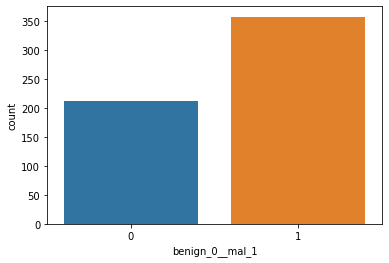

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

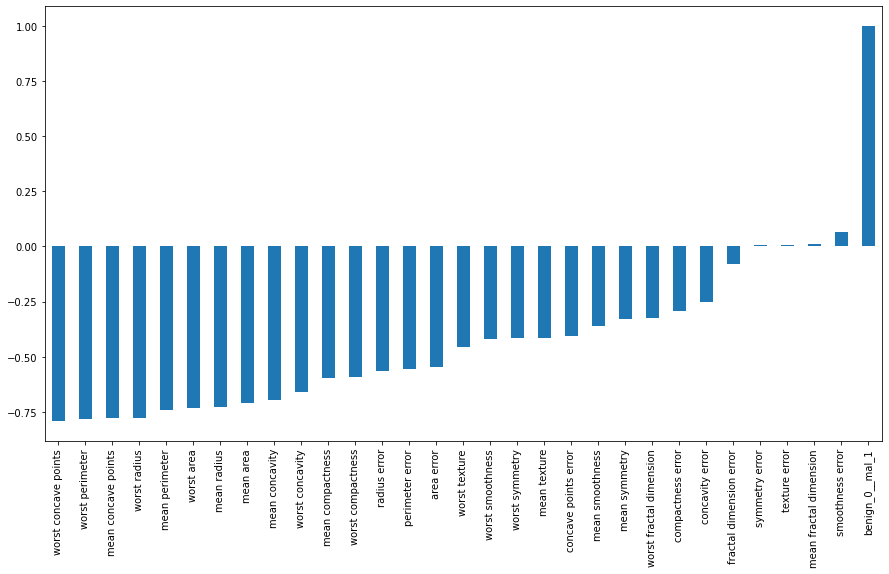

In [11]:
plt.figure(figsize=(15,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
# aim == dropping perfectly correlating values

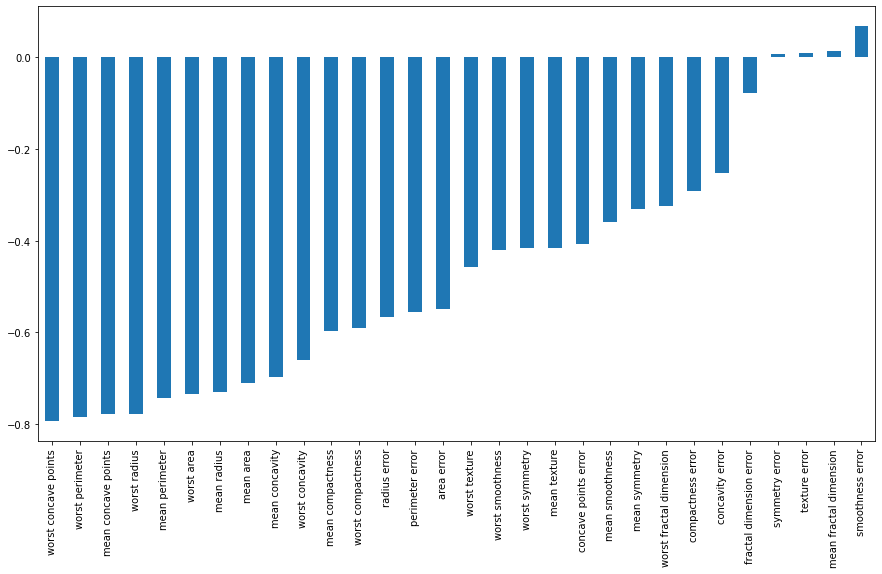

In [12]:
plt.figure(figsize=(15,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
# dropping the label column; it has 1 correlation with itself

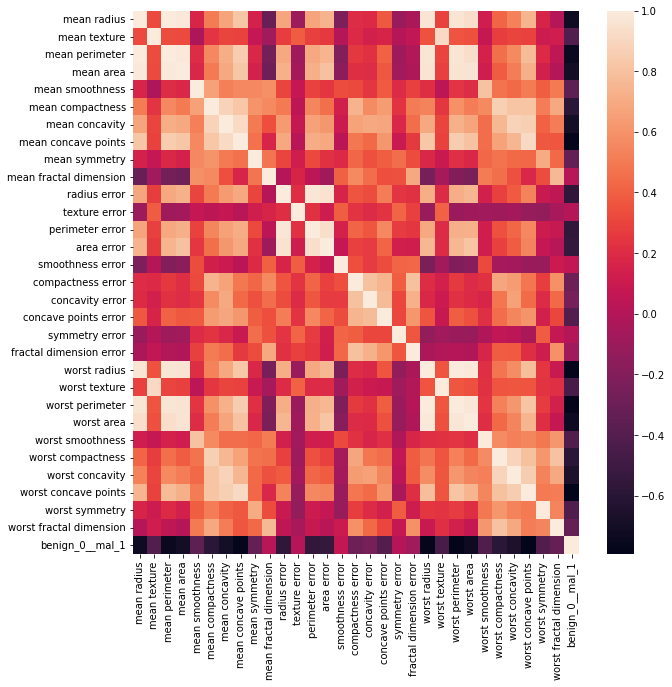

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler
# scaling the data with minmaxscale prepocessor

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6816 - val_loss: 0.6672
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6551 - val_loss: 0.6352
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6149 - val_loss: 0.5935
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5689 - val_loss: 0.5399
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5172 - val_loss: 0.4886
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4658 - val_loss: 0.4361
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4173 - val_loss: 0.3880
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3723 - val_loss: 0.3449
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3322 - val_loss: 0.3045
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3021 - val_loss: 0.2737
Epoch 11

In [26]:
losses = pd.DataFrame(model.history.history)

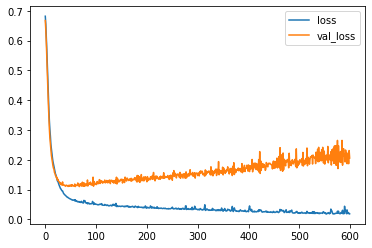

In [27]:
losses.plot() # overfitting

**Redefining the model to eliminate overfitting**

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
# have to choose a metric for monitoring, have to set patience variable <= EarlyStopping(help)

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# minimize the val_loss, waiting 25 epoch after identifying a stop

In [35]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 29ms/step - loss: 0.6634 - val_loss: 0.6284
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6239 - val_loss: 0.5996
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5923 - val_loss: 0.5640
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5544 - val_loss: 0.5213
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5111 - val_loss: 0.4752
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4635 - val_loss: 0.4267
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4164 - val_loss: 0.3754
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3723 - val_loss: 0.3325
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3344 - val_loss: 0.2951
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2967 - val_loss: 0.2621
Epoch 11

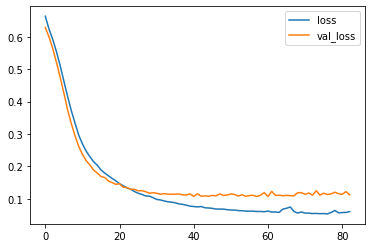

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Dropout AND early stopping**

In [38]:
# adding dropout layers == turn off a % of neurons automatically and randomly
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(.5)) # probability of which neurons are randomly turned off
model.add(Dense(15,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid')) # binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam')

In [39]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6745 - val_loss: 0.6312
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6362 - val_loss: 0.6067
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6158 - val_loss: 0.5777
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.5470
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6011 - val_loss: 0.5182
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5485 - val_loss: 0.4919
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5526 - val_loss: 0.4635
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4862 - val_loss: 0.4299
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5005 - val_loss: 0.4030
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4745 - val_loss: 0.3790
Epoch 11

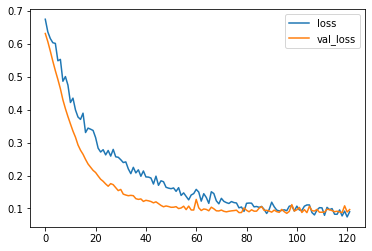

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Full evaluation**

In [47]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [51]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
